In [12]:
from Dataloader.dataloader import offical_exist_data
from Dataloader.dataloader import trans_data
from model.conv_net import LeNet, use_model, AlexNet
from train.train import train, evaluate_accuracy
import torch
from torch import nn

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# get Fashion_MNIST data
train_iter, test_iter = offical_exist_data(data_name='FashionMNIST')
# load LeNet
net = LeNet(img_size=(28,28))
# choose optimizer
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
# train
train_loss, train_acc, test_acc = train(net, train_iter, test_iter,
                                        batch_size=256, num_epochs=10, 
                                        optimizer=optimizer, 
                                        loss=nn.CrossEntropyLoss(), 
                                        device=device)
# save model
path = r'./model/saved_model/LeNet_fashion_MNist_test_acc_0.804_epoch_10.pth'
#torch.save(net.state_dict(), path)

training on  cpu
epoch 1, loss 1.8477, train acc 0.322, test acc 0.571, time 40.3 sec
epoch 2, loss 0.9436, train acc 0.634, test acc 0.692, time 38.9 sec
epoch 3, loss 0.7617, train acc 0.716, test acc 0.730, time 39.2 sec
epoch 4, loss 0.6725, train acc 0.743, test acc 0.743, time 39.0 sec
epoch 5, loss 0.6213, train acc 0.757, test acc 0.756, time 38.7 sec
epoch 6, loss 0.5835, train acc 0.770, test acc 0.770, time 38.8 sec
epoch 7, loss 0.5521, train acc 0.785, test acc 0.780, time 38.6 sec
epoch 8, loss 0.5249, train acc 0.797, test acc 0.797, time 38.3 sec
epoch 9, loss 0.5025, train acc 0.807, test acc 0.802, time 38.8 sec
epoch 10, loss 0.4792, train acc 0.819, test acc 0.806, time 42.2 sec


In [3]:
train_loss

[1.847695572325524,
 0.943569067437598,
 0.761680949241557,
 0.6725248319037417,
 0.6212519724318322,
 0.58348554410833,
 0.552090352646848,
 0.5248822269287515,
 0.5025038104108039,
 0.4791793403473306]

#### 加载模型

In [2]:
# load LeNet
net = LeNet(img_size=(28,28))
net.load_state_dict(torch.load(r'./model/saved_model/LeNet_fashion_MNist_test_acc_0.804_epoch_10.pth'))

<All keys matched successfully>

In [3]:
import torchvision.transforms as transforms
import torchvision
test = torchvision.datasets.FashionMNIST(root='../../Datasets/FashionMNIST',train=False,download=True,
                                              transform=transforms.ToTensor())

In [28]:
test_data = torch.stack([test[i+10][0] for i in range(5)],0)

In [29]:
pre_label = use_model(test_data, net)

In [30]:
pre_label

tensor([4, 5, 5, 3, 4])

In [31]:
real_label = [test[i+10][1] for i in range(5)]

In [32]:
real_label

[4, 5, 7, 3, 4]

#### 画数据图

In [33]:
from utils.utils import show_images_labels

In [34]:
from utils.utils import show_images_real_pre_labels

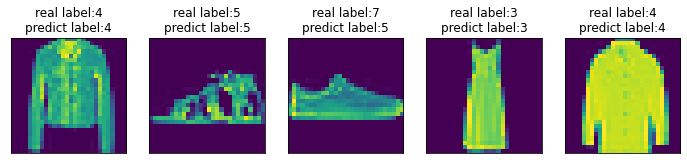

In [36]:
show_images_real_pre_labels(test_data, real_label, pre_label)

#### 画训练图

In [4]:
import matplotlib.pyplot as plt
import numpy as np

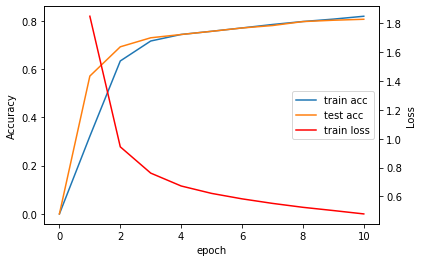

In [6]:
training_status_per_epoch(train_loss, train_acc, test_acc)

In [ ]:
# get Fashion_MNIST data
train_iter, test_iter = offical_exist_data(data_name='FashionMNIST',resize=227)
# load LeNet
net = AlexNet(1,10)
# choose optimizer
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
# train
train_loss, train_acc, test_acc = train(net, train_iter, test_iter,
                                        batch_size=256, num_epochs=2, 
                                        optimizer=optimizer, 
                                        loss=nn.CrossEntropyLoss(), 
                                        device=device)
# save model
path = r'./model/saved_model/LeNet_fashion_MNist_test_acc_0.804_epoch_10.pth'
#torch.save(net.state_dict(), path)

training on  cpu
epoch 1, loss 0.7198, train acc 0.727, test acc 0.843, time 7453.5 sec


In [ ]:
path = r'./model/saved_model/AlexNet_fashion_MNist_epoch_2.pth'
torch.save(net.state_dict(), path)

In [4]:
# load LeNet
net = AlexNet(1,10)
net.load_state_dict(torch.load(r'./model/saved_model/AlexNet_fashion_MNist_epoch_2.pth'))

<All keys matched successfully>

In [7]:
import torchvision.transforms as transforms
import torchvision

trans = []
trans.append(torchvision.transforms.Resize(size=227))
trans.append(torchvision.transforms.ToTensor())
transform = torchvision.transforms.Compose(trans)
test = torchvision.datasets.FashionMNIST(root='../../Datasets/FashionMNIST',train=False,download=True,
                                              transform=transform)

In [8]:
test_data = torch.stack([test[i+10][0] for i in range(5)],0)

In [9]:
pre_label = use_model(test_data, net)

In [10]:
pre_label

tensor([4, 5, 5, 3, 4])

In [11]:
[test[i+10][1] for i in range(5)]

[4, 5, 7, 3, 4]

In [13]:
# get Fashion_MNIST data
train_iter, test_iter = offical_exist_data(data_name='FashionMNIST',resize=227)

In [14]:
evaluate_accuracy(test_iter, net)

0.8714

In [15]:
test_iter